<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#lambda" data-toc-modified-id="lambda-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>lambda</a></span></li><li><span><a href="#cost" data-toc-modified-id="cost-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>cost</a></span></li></ul></div>

(20, 3)
[[1.7582500e-06 5.7500425e+06 5.7542500e+06]
 [8.2517500e-06 6.7500325e+06 4.7552500e+06]
 [5.2547500e-06 3.2500675e+06 9.2507500e+06]
 [6.7532500e-06 1.2500875e+06 2.5975000e+05]
 [8.7512500e-06 7.2500275e+06 2.2577500e+06]
 [3.7562500e-06 2.5009750e+05 9.7502500e+06]
 [9.2507500e-06 7.5009250e+05 3.2567500e+06]
 [5.7542500e-06 9.2500075e+06 6.7532500e+06]
 [7.7522500e-06 4.2500575e+06 8.7512500e+06]
 [2.2577500e-06 2.7500725e+06 5.2547500e+06]
 [7.5925000e-07 2.2500775e+06 1.2587500e+06]
 [4.7552500e-06 5.2500475e+06 7.5925000e+05]
 [7.2527500e-06 8.2500175e+06 8.2517500e+06]
 [1.2587500e-06 4.7500525e+06 1.7582500e+06]
 [3.2567500e-06 9.7500025e+06 3.7562500e+06]
 [6.2537500e-06 6.2500375e+06 7.2527500e+06]
 [2.5975000e-07 3.7500625e+06 7.7522500e+06]
 [4.2557500e-06 8.7500125e+06 2.7572500e+06]
 [9.7502500e-06 1.7500825e+06 4.2557500e+06]
 [2.7572500e-06 7.7500225e+06 6.2537500e+06]]


<IPython.core.display.Javascript object>


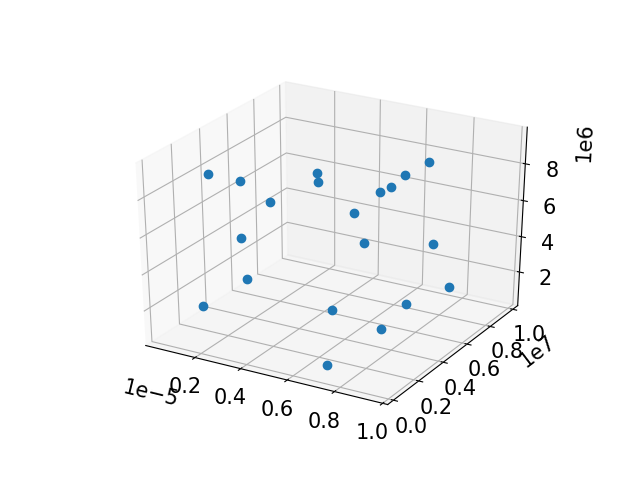

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS
%matplotlib notebook

# a=[1.0E-06, 1.0E-07]
# z=[1.0E3, 1.0E4]
# e=[1.0e5, 1.0e6]

a=[10**-8.0, 10**-5.0]
z=[10**2.0, 10**5.0]
e=[10**4.0, 10**7.0]

xlimits = np.array([a, z,e])
sampling = LHS(xlimits=xlimits)#,criterion='ese')

num = 20
x = sampling(num)

print(x.shape)
print(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[:, 0],x[:, 1],x[:,2], "o")
ax.set_xlim(a)
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

plt.show()

In [2]:
from scipy.spatial.distance import cdist
from smt.sampling_methods import LHS

lambda1 = np.array([[7.075e-07, 1.225e+03, 7.075e+05],
                    [1.225e-07, 6.175e+03, 7.975e+05],
                    [2.125e-07, 6.625e+03, 9.775e+05],
                    [9.775e-07, 5.725e+03, 5.275e+05],
                    [3.475e-07, 4.825e+03, 4.825e+05],
                    [8.425e-07, 7.525e+03, 2.125e+05],
                    [9.325e-07, 7.975e+03, 6.175e+05],
                    [4.825e-07, 8.425e+03, 7.525e+05],
                    [4.375e-07, 5.275e+03, 2.575e+05],
                    [7.525e-07, 2.125e+03, 6.625e+05],
                    [3.925e-07, 3.925e+03, 4.375e+05],
                    [2.575e-07, 3.475e+03, 1.675e+05],
                    [6.175e-07, 2.575e+03, 3.025e+05],
                    [3.025e-07, 1.675e+03, 3.925e+05],
                    [7.975e-07, 9.325e+03, 3.475e+05],
                    [5.275e-07, 8.875e+03, 8.875e+05],
                    [1.675e-07, 3.025e+03, 5.725e+05],
                    [8.875e-07, 9.775e+03, 1.225e+05],
                    [5.725e-07, 7.075e+03, 8.425e+05],
                    [6.625e-07, 4.375e+03, 9.325e+05]])

class addLHS(object):
    def __init__(self, nlevel, xlimits, firstlhs):
        """
        Constructor where values of options can be passed in.
        Parameters
        ----------
        nlevel : integer.
            The number of design of experiments to be built
        xlimits : ndarray
            The interval of the domain in each dimension with shape (nx, 2)
        """
        self.nlevel = nlevel
        self.xlimits = xlimits
        self.firstlhs = firstlhs
        


    def __call__(self,nb_samples_hifi):
        """
        Builds nlevel nested design of experiments of dimension dim and size n_samples.
        Each doe sis built with the optmized lhs procedure.
        Builds the highest level first; nested properties are ensured by deleting
        the nearest neighbours in lower levels of fidelity.
        Parameters
        ----------
        nb_samples_hifi: The number of samples of the highest fidelity model.
            nb_samples_fi(n-1) = 2 * nb_samples_fi(n)
        Returns
        ------
        list of length nlevel of design of experiemnts from low to high fidelity level.
        """
        x=self.xlimits[0,:]
        y=self.xlimits[1,:]
        z=self.xlimits[2,:]
        
        ind=[]
        for i in self.firstlhs:
            if not x[0]<=i[0]<=x[1]:
                ind.append(int(np.where( self.firstlhs[:,0]==i[0])[0]))
                print('x',ind)
            else:
                if not y[0]<=i[1]<=y[1]:
                    ind.append(int(np.where( self.firstlhs[:,1]==i[1])[0]))
                    print('y',ind)
                else:
                    if not z[0]<=i[2]<=z[1]:
                        ind.append(int(np.where( self.firstlhs[:,2]==i[2])[0]))
                        print('z',ind)
        
        self.firstlhs=np.delete(self.firstlhs,ind,0)
        nb=len(self.firstlhs)
        nt = []
        if len(self.firstlhs)==0:
            for i in range(self.nlevel, 0, -1):
                nt.append(pow(2, i - 1) * nb_samples_hifi)
        else:
            for i in range(self.nlevel, 0, -1):
                nt.append(pow(2, i - 1) * len(self.firstlhs))

        if len(nt) != self.nlevel:
            raise ValueError("nt must be a list of nlevel elements")
        if np.allclose(np.sort(nt)[::-1], nt) == False:
            raise ValueError("nt must be a list of decreasing integers")
        doe = []
        p0 = LHS(xlimits=self.xlimits, criterion="ese")
        doe.append(p0(nt[0]))

        for i in range(1, self.nlevel):
            p = LHS(xlimits=self.xlimits, criterion="ese")
            doe.append(p(nt[i]))
        doe[-1]=self.firstlhs
        for i in range(1, self.nlevel)[::-1]:
            ind = []
            d = cdist(doe[i], doe[i - 1], "euclidean")
            for j in range(doe[i].shape[0]):
                dj = np.sort(d[j, :])
                k = dj[0]
                l = (np.where(d[j, :] == k))[0][0]
                m = 0
                while l in ind:
                    m = m + 1
                    k = dj[m]
                    l = (np.where(d[j, :] == k))[0][0]
                ind.append(l)
                
            doe[i - 1] = np.delete(doe[i - 1], ind, axis=0)
            doe[i - 1] = np.vstack((doe[i - 1], doe[i]))
        return doe,nb


xdoes = addLHS(nlevel=4, xlimits=np.log10(xlimits),firstlhs=np.log10(lambda1))
doe,nb=xdoes(20)
x1,x2,x3,x4=doe

In [3]:
# print(len(x1),len(x2),len(x3), len(x4))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(10**x1[:, 0],10**x1[:, 1],10**x1[:,2], "o",label=str(nb*7) + ' new points')
ax.plot(10**x2[:, 0],10**x2[:, 1],10**x2[:,2], "o",label=str(nb*3) + ' new points')
ax.plot(10**x3[:, 0],10**x3[:, 1],10**x3[:,2], "o",label=str(nb) + ' new points')
ax.plot(10**x4[:, 0],10**x4[:, 1],10**x4[:,2], "o",label=str(nb)+ ' first selection')

ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1[:, 0],x1[:, 1],x1[:,2], "o",label=str(nb*7) + ' new points')
ax.plot(x2[:, 0],x2[:, 1],x2[:,2], "o",label=str(nb*3) + ' new points')
ax.plot(x3[:, 0],x3[:, 1],x3[:,2], "o",label=str(nb) + ' new points')
ax.plot(x4[:, 0],x4[:, 1],x4[:,2], "o",label=str(nb)+' first points')
plt.legend()
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

# xdoes = addLHS(nlevel=4, xlimits=xlimits,firstlhs=lambda1)
# doe,nb=xdoes(20) 
# x1,x2,x3,x4=doe
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1[:, 0],x1[:, 1],x1[:,2], "o",label=str(nb*7) + ' new points')
# ax.plot(x2[:, 0],x2[:, 1],x2[:,2], "o",label=str(nb*3) + ' new points')
# ax.plot(x3[:, 0],x3[:, 1],x3[:,2], "o",label=str(nb) + ' new points')
# ax.plot(x4[:, 0],x4[:, 1],x4[:,2], "o",label=str(nb)+' first selection')
# ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

# plt.legend()


# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import glob
from scipy.interpolate import griddata
import re

def sort_human(l):
    convert = lambda text: float(text) if text.isdigit() else text
    alphanum = lambda key: [convert(c) for c in re.split('([-+]?[0-9]*\.?[0-9]*)', key)]
    l.sort(key=alphanum)
    return l

size=20
params = {'legend.fontsize': 'large',
#           'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
url = '/home/urrutyb/occigen/TiPACCS/inversion_Ronnie/step_3_inversion/OPTIM_betaonly_R*/'
# url = '/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_beta_R*/'
# url='/home/urrutyb/occigen/TiPACCS/inversion_Ronnie/step_3_inversion/OPTIM_BICG_R*/'
lambda1 = np.array([[0, 8.75125e+04, 0],
 [0, 3.75625e+04, 0],
 [0, 1.25875e+04, 0],
 [0, 3.25675e+04, 0],
 [0, 2.75725e+04, 0],
 [0, 6.25375e+04, 0],
 [0, 2.25775e+04, 0],
 [0, 5.25475e+04, 0],
 [0, 6.75325e+04, 0],
 [0, 7.25275e+04, 0],
 [0, 4.75525e+04, 0],
 [0, 7.59250e+03, 0],
 [0, 8.25175e+04, 0],
 [0, 9.25075e+04, 0],
 [0, 9.75025e+04, 0],
 [0, 2.59750e+03, 0],
 [0, 4.25575e+04, 0],
 [0, 7.75225e+04, 0],
 [0, 1.75825e+04, 0],
 [0, 5.75425e+04, 0]])


n = sort_human(glob.glob(url + "Cost_R*.dat"))[1:]
# print(n)
RMS=np.zeros(len(n))
cost=np.zeros(len(n))
for i in range(len(n)):
    RMS[i]=np.loadtxt(n[i],unpack=True)[2,-1]
    cost[i]=np.loadtxt(n[i],unpack=True)[1,-1]
print('RMS=',RMS)
print('cost=',cost)
    

n = sort_human(glob.glob(url + "Cost_dHdt_R*.dat"))[1:]
# print(n)
dhdt=np.zeros(len(n))
for i in range(len(n)):
    dhdt[i]=np.loadtxt(n[i],unpack=True)[1,-1]
print('J_div=',dhdt)
    

n = sort_human(glob.glob(url + "CostRegBeta_R*.dat"))[1:]
# print(n)
beta=np.zeros(len(n))
for i in range(len(n)):
    beta[i]=np.loadtxt(n[i],unpack=True)[1,-1]
print('J_beta=',beta)
 
Jtot=cost+lambda1[:,0]*dhdt+lambda1[:,1]*beta
print('Jtot=',Jtot)

RMS= [90.550028 89.699479 91.475137 91.014144 91.337891 90.455343 91.233949
 89.912161 91.284188 91.185657 90.628743 91.065791 91.434322 90.066607
 90.695848 91.383338 90.754063 90.819243 90.143011 91.526627]
cost= [6.3782454e+10 6.2589847e+10 6.5092385e+10 6.4437967e+10 6.4897207e+10
 6.3649135e+10 6.4749587e+10 6.2887007e+10 6.4820916e+10 6.4681059e+10
 6.3893395e+10 6.4511120e+10 6.5034311e+10 6.3103239e+10 6.3988049e+10
 6.4961805e+10 6.4070218e+10 6.4162282e+10 6.3210347e+10 6.5165685e+10]
J_div= [4.8223e+13 4.6231e+13 5.0121e+13 4.9136e+13 4.9880e+13 4.8110e+13
 4.9634e+13 4.6869e+13 4.9732e+13 4.9515e+13 4.8454e+13 4.9227e+13
 5.0093e+13 4.9596e+13 4.8613e+13 4.9976e+13 4.8769e+13 4.8925e+13
 4.7684e+13 5.0308e+13]
J_beta= [ 408.73077684 1190.22195441  209.21434151  288.59440351  230.26893105
  454.910114    248.35691388  762.48702441  238.86094396  259.26594109
  375.35986192  277.5208498   214.9952839   596.90072439  347.95250466
  221.97522114  327.68909707  306.41101915  512

## lambda

Je représente l'effet de la variation du paramètre de régularisation sur la fonction coût correspondant
On observe que donner du poids au fonction cout $J_\eta$ et $J_\beta$ permet de les réduire.
La pénalisation de la divergence du flux donne un résulats plus bruité qui semble montrer une augmentation de la fonction coût en augmentant $\lambda_{div}$.


<IPython.core.display.Javascript object>


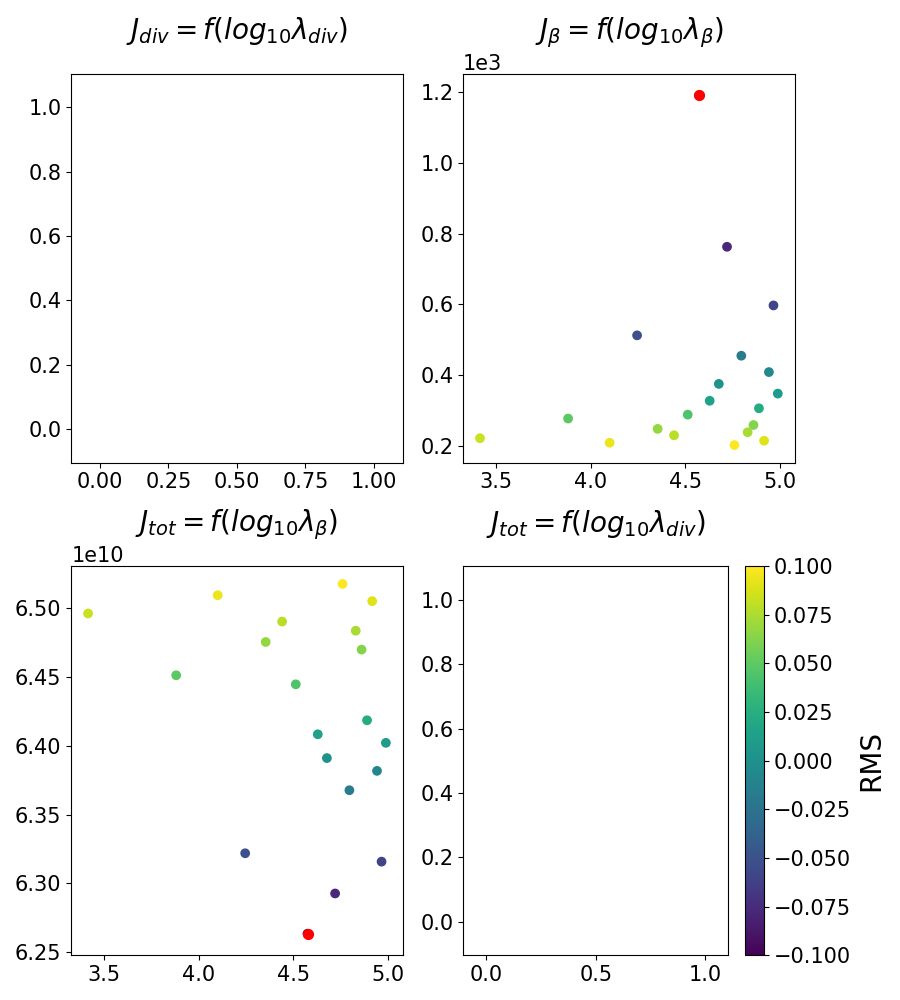

/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [7]:
fig,((ax3,ax2),(ax1,ax4))=plt.subplots(2,2,figsize=[9,10])

img=ax3.scatter(np.log10(lambda1[:,0]),dhdt,c=RMS)
ax3.scatter(np.log10(lambda1[RMS==min(RMS),0]),dhdt[RMS==min(RMS)],s=50,c='r')
ax3.set_title(r'$J_{div}=f(log_{10}\lambda_{div})$')
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax2.scatter(np.log10(lambda1[:,1]),beta,c=RMS)
ax2.scatter(np.log10(lambda1[RMS==min(RMS),1]),beta[RMS==min(RMS)],s=50,c='r')
ax2.set_title(r'$J_\beta=f(log_{10}\lambda_\beta)$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))



ax4.scatter(np.log10(lambda1[:,0]),Jtot,c=RMS)
ax4.scatter(np.log10(lambda1[RMS==min(RMS),0]),Jtot[RMS==min(RMS)],s=50,c='r')
ax4.set_title(r'$J_{tot}=f(log_{10}\lambda_{div})$')
ax4.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax1.scatter(np.log10(lambda1[:,1]),Jtot,c=RMS)
ax1.scatter(np.log10(lambda1[RMS==min(RMS),1]),Jtot[RMS==min(RMS)],s=50,c='r')
ax1.set_title(r'$J_{tot}=f(log_{10}\lambda_\beta)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


cb=fig.colorbar(img)
cb.set_label('RMS')


plt.tight_layout()

Je représente ici les paramètres de régularisation en fonction de la RMS. On observe une relation exponentielle entre la RMS et le parametre de regularisation $\lambda_\eta$.

Pour $\lambda_\beta$ et $\lambda_{div}$ aucune relation directe n'est observé

<IPython.core.display.Javascript object>


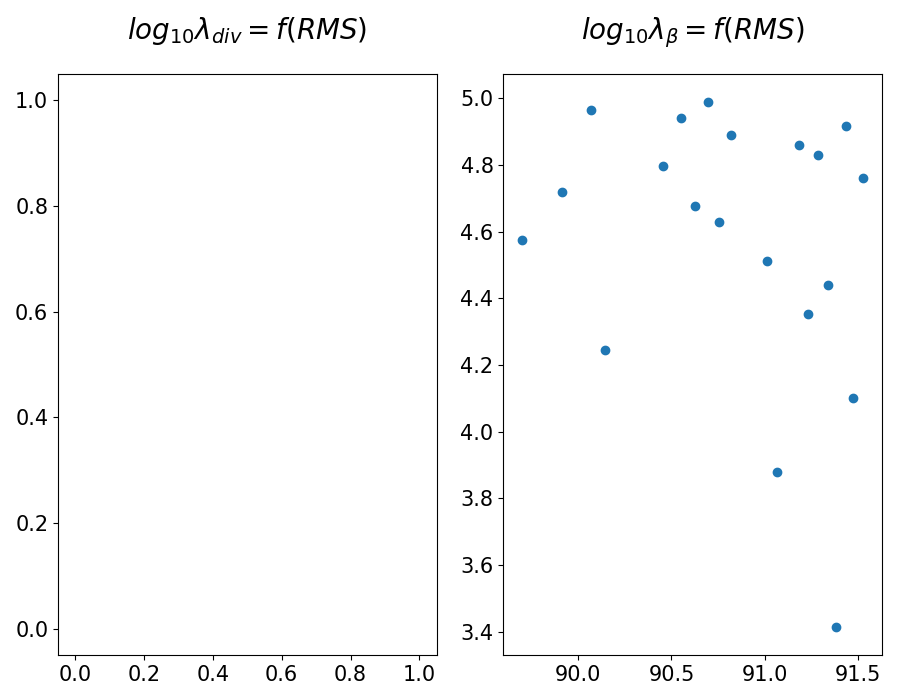

/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [8]:
fig,((ax1,ax2))=plt.subplots(1,2,figsize=[9,7])
img=ax1.scatter(RMS,np.log10(lambda1[:,0]))
ax1.set_title(r'$log_{10} \lambda_{div}=f(RMS)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
# ax1.set_ylim(1.0E-05, 1.0E-08)

img=ax2.scatter(RMS,np.log10(lambda1[:,1]))
ax2.set_title(r'$log_{10} \lambda_{\beta}=f(RMS)$')
# ax2.set_ylim(1.0E2,1.0E5)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))



plt.tight_layout()

In [ ]:
min(RMS)

## cost

Je choisi maintenant de représenté les valeurs des fonctions côut les unes en fonctions des autres.

<IPython.core.display.Javascript object>


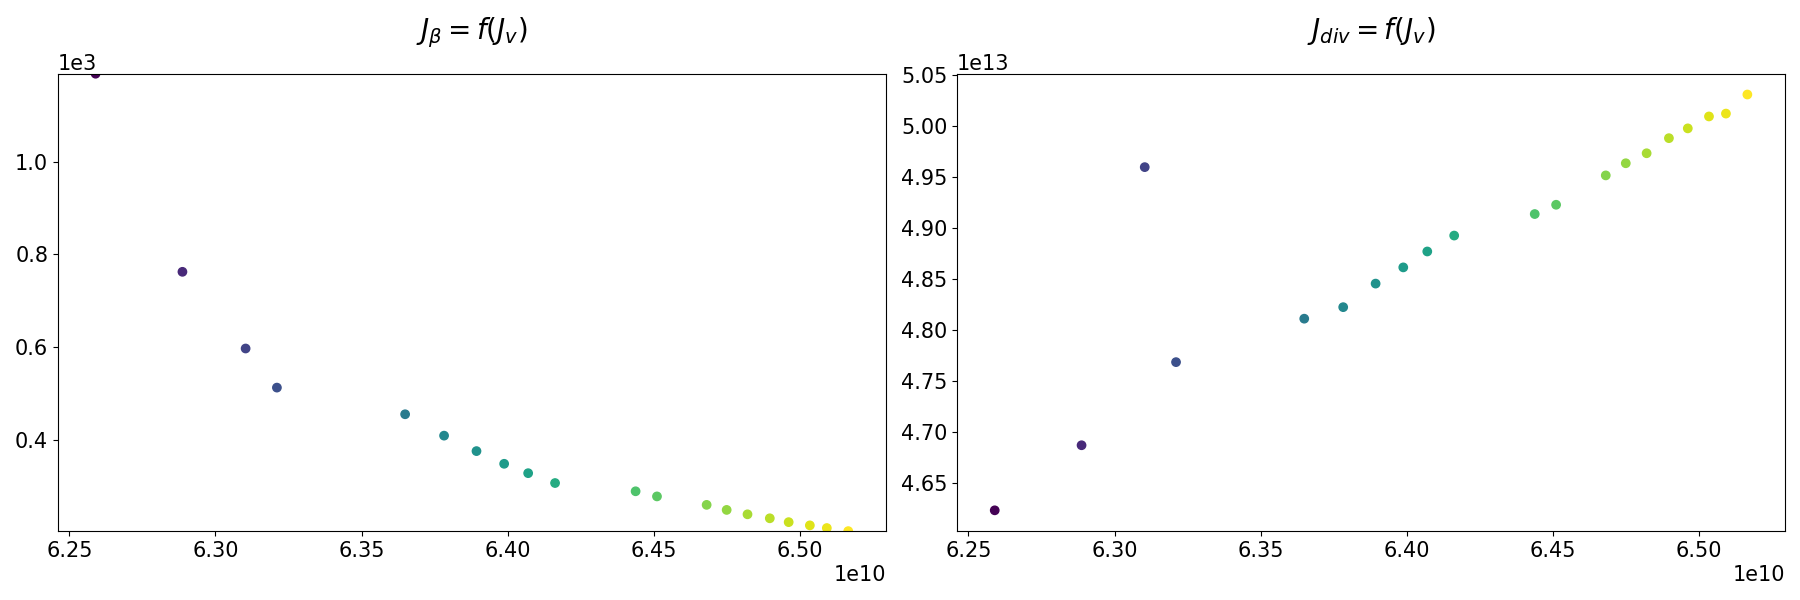

In [9]:
fig,((ax2,ax3))=plt.subplots(1,2,figsize=[18,6])


ax2.scatter(cost,beta,c=RMS)
cb.set_label('RMS')
ax2.set_ylim([min(beta)-1e-5,max(beta)+1e-5])
ax2.set_title(r'$J_\beta=f(J_{v})$')
# ax2.set_xlim(10,15)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


ax3.scatter(cost,dhdt,c=RMS)
ax3.set_title(r'$J_{div}=f(J_{v})$')
# ax3.set_ylim([min(eta)-0.1e-5,max(eta)+0.1e-5])
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
# ax3.set_ylim([1e-5,3e-5])
# ax3.set_xlim(10,15)


plt.tight_layout()
plt.savefig('/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/l-curve/l-curve-beta.pdf')

<IPython.core.display.Javascript object>


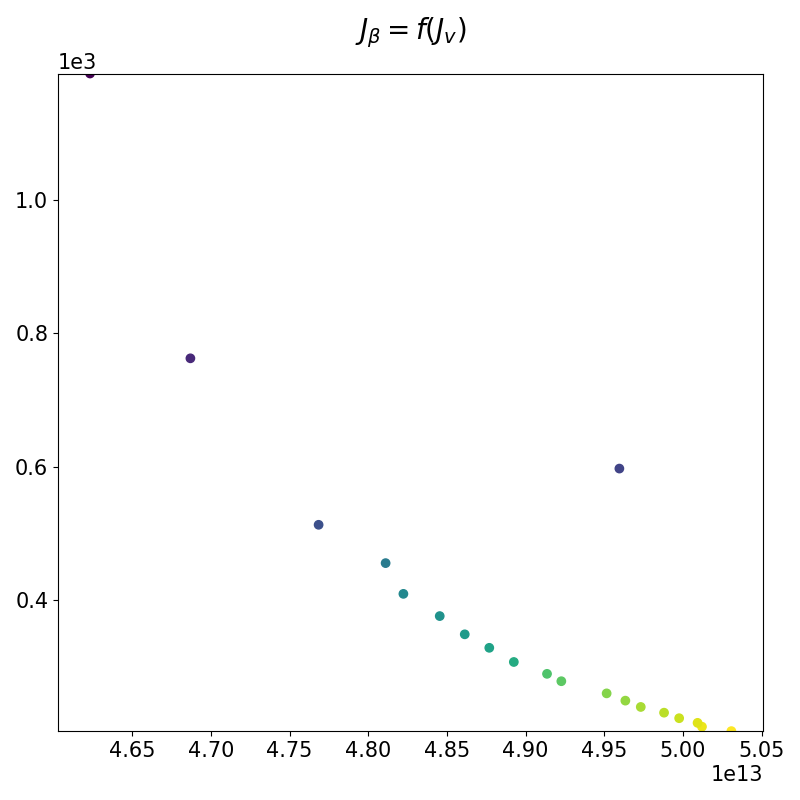

In [10]:
fig,((ax2))=plt.subplots(1,1,figsize=[8,8])


ax2.scatter(dhdt,beta,c=RMS)
cb.set_label('RMS')
ax2.set_ylim([min(beta)-1e-5,max(beta)+1e-5])
ax2.set_title(r'$J_\beta=f(J_{v})$')
# ax2.set_xlim(10,15)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

plt.tight_layout()
